In [ ]:
! pip install pandas pandasql

In [80]:
import pandas as pd
from pandasql import sqldf
import sqlite3

In [24]:
base= pd.read_csv("C:/Users/Usuário/Downloads/archive (2)/projetoCase/Student_performance_data _.csv")

In [25]:
base.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [78]:



# Criar uma conexão com um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')

# Carregar o DataFrame para o banco de dados SQLite
base.to_sql('base', conn, index=False, if_exists='replace')

# Definir a função lambda pysqldf para usar a conexão SQLite
pysqldf = lambda q: pd.read_sql_query(q, conn)

# Template da query
query = """
SELECT *
FROM base
"""

# Executar a query
resultado = pysqldf(query)
print(resultado)

# Fechar a conexão com o banco de dados



     StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0         1001   17       1          0                  2        19.833723   
1         1021   16       1          0                  3         2.621597   
2         1026   16       1          0                  3         2.710337   
3         1029   18       0          0                  0        18.679748   
4         1042   17       0          0                  1        14.294046   
..         ...  ...     ...        ...                ...              ...   
276       3363   17       1          2                  2         0.675783   
277       3364   18       1          2                  1        11.863120   
278       3366   17       1          2                  2         6.918990   
279       3367   16       1          0                  2         6.959373   
280       3390   16       1          0                  2         6.805500   

     Absences  Tutoring  ParentalSupport  Extracurricular  Spor

In [79]:
resultado

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1021,16,1,0,3,2.621597,2,0,3,0,0,0,1,2.778411,2.0
2,1026,16,1,0,3,2.710337,5,0,4,0,0,1,0,2.977852,2.0
3,1029,18,0,0,0,18.679748,10,0,3,1,0,0,0,2.854804,2.0
4,1042,17,0,0,1,14.294046,7,0,2,0,0,0,0,2.625128,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,3363,17,1,2,2,0.675783,19,1,0,0,0,0,0,1.041029,2.0
277,3364,18,1,2,1,11.863120,9,0,3,1,0,0,0,2.669979,2.0
278,3366,17,1,2,2,6.918990,3,0,2,0,0,0,0,2.742092,2.0
279,3367,16,1,0,2,6.959373,17,0,0,0,0,0,0,0.984294,2.0


In [30]:
#traga as colunas StudentId, Age , Gender, GPA , Absences e filtre apenas estudantes que tiveram menos de 11 faltas

# Template da query
query = """
SELECT StudentId, Age , Gender, GPA , Absences
FROM base
WHERE Absences <11;
"""

# Executar a query
resultado_menos11_faltas = pysqldf(query)
resultado_menos11_faltas  #845 linhas




,StudentID,Age,Gender,GPA,Absences
0,1001,17,1,2.929196,7
1,1002,18,0,3.042915,0
2,1006,18,0,3.084184,0
3,1007,15,0,2.748237,10
4,1009,17,0,2.896819,1
...,...,...,...,...,...
840,3378,18,0,2.652355,8
841,3381,16,1,1.979379,8
842,3382,15,0,2.956255,5
843,3388,18,1,3.455509,2


In [32]:
# substitua os valores da coluna gender por feminino e masculino
resultado_menos11_faltas['Gender']=resultado_menos11_faltas['Gender'].replace({0:'masculino',1:'feminino'})
resultado_menos11_faltas

,StudentID,Age,Gender,GPA,Absences
0,1001,17,feminino,2.929196,7
1,1002,18,masculino,3.042915,0
2,1006,18,masculino,3.084184,0
3,1007,15,masculino,2.748237,10
4,1009,17,masculino,2.896819,1
...,...,...,...,...,...
840,3378,18,masculino,2.652355,8
841,3381,16,feminino,1.979379,8
842,3382,15,masculino,2.956255,5
843,3388,18,feminino,3.455509,2


In [33]:
#desta amostra qual genero faltou mais? 

# Template da query
query = """
SELECT SUM(Absences) AS soma_faltas
FROM base
GROUP BY Gender;
"""

# Executar a query
resultado_genero_faltouMais = pysqldf(query)
resultado_genero_faltouMais # genero femino faltou mais com 17.987 faltas

,soma_faltas
0,16796
1,17987


In [34]:
#qual a media dos estudantes que faltaram 10 vezes? 
# Template da query
query = """
SELECT AVG(GPA) AS media_estudantes_faltas_10
FROM base
WHERE Absences = 10;
"""

# Executar a query
resultado_MEDIA_ESTUDANTES = pysqldf(query)
resultado_MEDIA_ESTUDANTES

,media_estudantes_faltas_10
0,2.440346


In [35]:
#ela é maior do que a média do resto da amostra?
# Resposta : a media dos estudantes que faltaram 10 vzs é de 2.44
# a media dos estudantes que faltaram + 10 vzs é de 1.38
#  a media dos estudantes que faltaram menos de 10 vzs é de 2.88 , logo os alunos que faltaram menos de 10 vzs tem média maior

# Template da query ## Média dos estudantes que faltaram menos ou mais de 10 vezes
query = """
SELECT AVG(GPA) AS media_estudantes_ComMenos_10_Faltas
FROM base
WHERE Absences < 10 ;
"""

# Executar a query
resultado_media_estudantes_FaltaramMenosOuMais10 = pysqldf(query)
resultado_media_estudantes_FaltaramMenosOuMais10

,media_estudantes_ComMenos_10_Faltas
0,2.889258


In [36]:
# Template da query ## Média dos estudantes que faltaram mais de 10 vezes
query = """
SELECT AVG(GPA) AS media_estudantes_ComMais_10_Faltas
FROM base
WHERE Absences > 10 ;
"""

# Executar a query
resultado_media_estudantes_FaltaramMaisOuMais10 = pysqldf(query)
resultado_media_estudantes_FaltaramMaisOuMais10

,media_estudantes_ComMais_10_Faltas
0,1.386915


In [ ]:
#vc acha que a media da nota dos estudantes pode estra relacionada a alguma variavl? explique

# Resposta os Alunos que faltam menos tendem a ter uma nota maior , logo a média da nota está bem relacionada a variavel Absences 
#Pra concluir melhor  mostro esses dados pelo heatmap

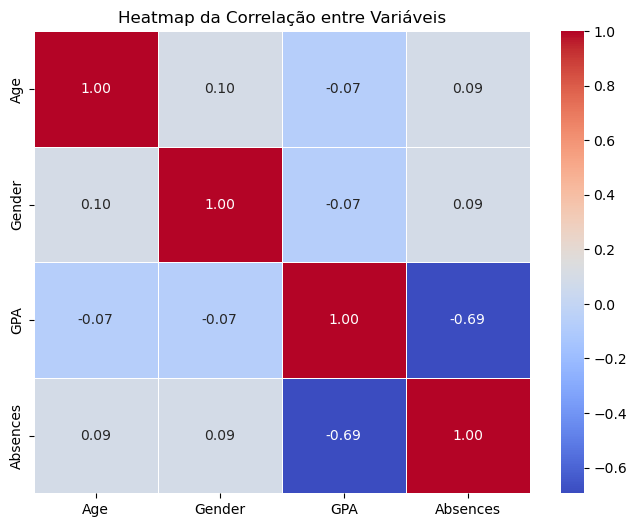

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação entre as variáveis
correlacao_matrix = resultado[['Age', 'Gender', 'GPA', 'Absences']].corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionar título
plt.title('Heatmap da Correlação entre Variáveis')

# Exibir o heatmap
plt.show()

In [39]:
#Utilizando a base de dados utilizada no exercicio anterior faça:
## Cruze com a base de dados criada anteriormente e traga a informação da coluna StudyTimeWeekly apenas dos estudantes com as maiores notas por idade e genero. Dica as linhas que nao forem de estudantes com nota maxima por idade devem ser nulas!

# Subconsulta para encontrar a maior nota por idade e gênero
# Função para executar consultas SQL em DataFrames do pandas
pysqldf = lambda q: sqldf(q, globals())


query = """
WITH MaxGPA AS (
    SELECT Age, Gender, MAX(GPA) AS MaxGPA
    FROM resultado_menos11_faltas
    GROUP BY Age, Gender
)
SELECT b.StudentID, b.Age, b.Gender, b.GPA, a.StudyTimeWeekly
FROM resultado_menos11_faltas b
JOIN MaxGPA m
ON b.Age = m.Age AND b.Gender = m.Gender AND b.GPA = m.MaxGPA
LEFT JOIN base a
ON b.StudentID = a.StudentID
"""

# Executar a query
resultado = pysqldf(query)
print("\nResultado da consulta:") 
print(resultado) # 



Resultado da consulta:
   StudentID  Age     Gender       GPA  StudyTimeWeekly
0       1045   18   feminino  4.000000        18.921512
1       1364   16  masculino  3.880640         7.873638
2       1443   15  masculino  4.000000        19.424398
3       1920   18  masculino  3.869587        18.106437
4       2261   17   feminino  3.984674         9.001905
5       2279   15   feminino  4.000000        18.899696
6       2706   18   feminino  4.000000         8.858282
7       2920   15  masculino  4.000000        17.442121
8       3029   16   feminino  4.000000        18.656924
9       3320   17  masculino  4.000000         9.285447


In [ ]:
#Esse segundo teste envolve apenas a manipulação de dados com inguagem python em sí .Os proximos exercicios nao podem ser resolvidos com linguagem SQL!
#Pode utilizar as bibliotecas que se sentir a vontade ,desde que nao envolva a linguagem SQL

In [62]:
base['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [103]:


# Certificar-se de que 'GradeClass' é do tipo float e 'Sports' é do tipo int
#base['GradeClass'] = base['GradeClass'].astype(float)
#base['Sports'] = base['Sports'].astype(int)

#Imprimir valores únicos de 'GradeClass' para diagnóstico
print("Valores únicos em 'GradeClass':", base['GradeClass'].unique())

# Identificar os valores distintos de GradeClass
grade_classes = base['GradeClass'].unique()

# Criar um dicionário para armazenar os novos DataFrames
grade_class_dfs = {}

# Loop para criar um DataFrame para cada valor distinto de GradeClass
for grade_class in grade_classes:
    # Filtrar os dados para o GradeClass atual
    df_filtered = base[base['GradeClass'] == grade_class]
    # Excluir os estudantes que praticam esportes
    df_filtered_no_sports = df_filtered[df_filtered['Sports'] == 0]
    # Armazenar o DataFrame no dicionário
    grade_class_dfs[grade_class] = df_filtered_no_sports
    
    
    print(f"\nAmostra de registros para GradeClass = {grade_class}:")
    print(df_filtered_no_sports.head())
    print(f"Número de registros para GradeClass = {grade_class}: {df_filtered_no_sports.shape[0]}")




Valores únicos em 'GradeClass': [2.]

Amostra de registros para GradeClass = 2.0:
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0        1001   17       1          0                  2        19.833723   
20       1021   16       1          0                  3         2.621597   
25       1026   16       1          0                  3         2.710337   
28       1029   18       0          0                  0        18.679748   
41       1042   17       0          0                  1        14.294046   

    Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0          7         1                2                0       0      1   
20         2         0                3                0       0      0   
25         5         0                4                0       0      1   
28        10         0                3                1       0      0   
41         7         0                2                0       0      0   

    

In [104]:
df_filtered_no_sports.head() 


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
20,1021,16,1,0,3,2.621597,2,0,3,0,0,0,1,2.778411,2.0
25,1026,16,1,0,3,2.710337,5,0,4,0,0,1,0,2.977852,2.0
28,1029,18,0,0,0,18.679748,10,0,3,1,0,0,0,2.854804,2.0
41,1042,17,0,0,1,14.294046,7,0,2,0,0,0,0,2.625128,2.0


In [107]:
#com as  bases criadas anteriormente responda :
## A média de idade muda entre os grupos?
import pandas as pd

# Supondo que você já tem o dicionário `grade_class_dfs` com DataFrames para cada valor de 'GradeClass'

# Criar uma lista para armazenar os dados de médias de idade
age_means_list = []

# Calcular a média de idade para cada grupo de GradeClass
for grade_class, df in grade_class_dfs.items():
    mean_age = df['Age'].mean()
    # Adicionar os resultados à lista
    age_means_list.append({'GradeClass': grade_class, 'MeanAge': mean_age})

# Criar um DataFrame a partir da lista de médias de idade
age_means = pd.DataFrame(age_means_list)

# Exibir as médias de idade para cada grupo
print("Média de idade para cada GradeClass:")
print(age_means)

# Opcional: Se quiser verificar as diferenças de média de idade
print("\nDiferença entre as médias de idade dos grupos:")
print(age_means.set_index('GradeClass').diff().dropna())

## A média de tempo de estudo por semana muda entre os grupos ?
## A média de faltas muda entre os grupos?

Média de idade para cada GradeClass:
   GradeClass    MeanAge
0         2.0  16.544484

Diferença entre as médias de idade dos grupos:
Empty DataFrame
Columns: [MeanAge]
Index: []


In [76]:
## A média de tempo de estudo por semana muda entre os grupos?
import pandas as pd

# Supondo que você já tem o dicionário `grade_class_dfs` com DataFrames para cada valor de 'GradeClass'

# Criar uma lista para armazenar os dados de médias de tempo de estudo
study_time_means_list = []

# Calcular a média de StudyTimeWeekly para cada grupo de GradeClass
for grade_class, df in grade_class_dfs.items():
    mean_study_time = df['StudyTimeWeekly'].mean()
    # Adicionar os resultados à lista
    study_time_means_list.append({'GradeClass': grade_class, 'MeanStudyTimeWeekly': mean_study_time})

# Criar um DataFrame a partir da lista de médias de tempo de estudo
study_time_means = pd.DataFrame(study_time_means_list)

# Exibir as médias de tempo de estudo para cada grupo
print("Média de tempo de estudo por semana para cada GradeClass:")
print(study_time_means)

# Opcional: Se quiser verificar as diferenças de média de tempo de estudo dos grupos
print("\nDiferença entre as médias de tempo de estudo dos grupos:")
print(study_time_means.set_index('GradeClass').diff().dropna())


Média de tempo de estudo por semana para cada GradeClass:
   GradeClass  MeanStudyTimeWeekly
0         2.0            10.105980
1         1.0            11.727844
2         4.0             9.182816
3         3.0             9.527777
4         0.0            11.064697

Diferença entre as médias de tempo de estudo dos grupos:
            MeanStudyTimeWeekly
GradeClass                     
1.0                    1.621864
4.0                   -2.545029
3.0                    0.344961
0.0                    1.536920


In [77]:
##A média de falta entre os grupos muda entre os grupos?
import pandas as pd

# Supondo que você já tem o dicionário `grade_class_dfs` com DataFrames para cada valor de 'GradeClass'

# Criar uma lista para armazenar os dados de médias de faltas
absence_means_list = []

# Calcular a média de Absences para cada grupo de GradeClass
for grade_class, df in grade_class_dfs.items():
    mean_absences = df['Absences'].mean()
    # Adicionar os resultados à lista
    absence_means_list.append({'GradeClass': grade_class, 'MeanAbsences': mean_absences})

# Criar um DataFrame a partir da lista de médias de faltas
absence_means = pd.DataFrame(absence_means_list)

# Exibir as médias de faltas para cada grupo
print("Média de faltas para cada GradeClass:")
print(absence_means)

# Opcional: Se quiser verificar as diferenças de média de faltas dos grupos
print("\nDiferença entre as médias de faltas dos grupos:")
print(absence_means.set_index('GradeClass').diff().dropna())


Média de faltas para cada GradeClass:
   GradeClass  MeanAbsences
0         2.0      6.537367
1         1.0      5.090395
2         4.0     20.580494
3         3.0     10.881944
4         0.0      6.579710

Diferença entre as médias de faltas dos grupos:
            MeanAbsences
GradeClass              
1.0            -1.446971
4.0            15.490098
3.0            -9.698549
0.0            -4.302234
